In [3]:
import numpy as np
import matplotlib.pyplot as plt

Heston model:

$$d S _ { t } = \mu S _ { t } d t + \sqrt { \nu _ { t } } S _ { t } d W _ { t } ^ { S }$$
$$d \nu _ { t } = \kappa \left( \theta - \nu _ { t } \right) d t + \xi \sqrt { \nu _ { t } } d W _ { t } ^ { \nu }$$

In [88]:
zoom = 100

In [19]:
dt = 1/252
T = 1
n = int(T/dt) # Number of steps
Z_s = np.random.randn(n)
zrv = np.random.randn(n)

def heston_model(kappa, theta, xi, rho):
    Z_v = rho * Z_s + np.sqrt(1-rho**2) * zrv
    r=0
    q=0
    s0=1
    
    v = np.zeros(n)
    v[0] = theta

    # Stock prices in logarithmic form
    s = np.zeros(n)
    s[0] = np.log(s0)

    for t in range(0, n-1):
        v_unsafe = v[t] + kappa * (theta - v[t]) * dt + xi * np.sqrt(v[t]) * np.sqrt(dt) * Z_v[t] + 0.25 * xi**2 * dt * (Z_v[t]**2 - 1)
        # Truncate
        v[t+1] = max(v_unsafe, 0)
        s[t+1] = s[t] + (r - q - 0.5 * v[t]) * dt + np.sqrt(v[t])* np.sqrt(dt) * Z_s[t]

    # Calculate returns
    returns = np.array([0] + [p2 - p1 for p2, p1 in zip(s, s[1:])])
    return v, s, returns


In [83]:
def plot_param_combos(parameter_combos, T=None):
    prices = []
    volas = []
    returns = []

    for idx, param in enumerate(parameter_combos):
        kappa, theta, xi, rho = param
        v,s,r = heston_model(kappa, theta, xi, rho)

        prices.append(s)
        volas.append(v)
        returns.append(r)

        ax1 = plt.subplot(len(parameter_combos), 1, idx+1)
        ax1.plot(np.exp(s)[:T], 'b-')
        ax1.set_xlabel('time')

        # Make the y-axis label, ticks and tick labels match the line color.
        ax1.set_ylabel('Price', color='b')
        ax1.tick_params('y', colors='b')

        ax2 = ax1.twinx()
        ax2.plot(v[:T], 'r')
        ax2.set_ylabel('volatility', color='r')
        ax2.tick_params('y', colors='r')
    return prices, volas, returns

In [81]:
def plot_prices_volas_returns(prices, volas, returns, T=None):
    plt.subplot(3, 1, 1)
    plt.plot(np.exp(prices[0][:T]), label='first combo')
    plt.plot(np.exp(prices[1][:T]), label='second combo')
    plt.plot(np.exp(prices[2][:T]), label='third combo')
    plt.legend(loc='best')
    plt.title("Price")

    plt.subplot(3, 1, 2)
    plt.plot(np.exp(volas[0][:T]), label='first combo')
    plt.plot(np.exp(volas[1][:T]), label='second combo')
    plt.plot(np.exp(volas[2][:T]), label='third combo')
    plt.legend(loc='best')
    plt.title("Variance")
    
    plt.subplot(3, 1, 3)
    plt.plot(np.exp(returns[0][:T]), label='first combo')
    plt.plot(np.exp(returns[1][:T]), label='second combo')
    plt.plot(np.exp(returns[2][:T]), label='third combo')
    plt.legend(loc='best')
    plt.title("Returns")

With different Kappa value

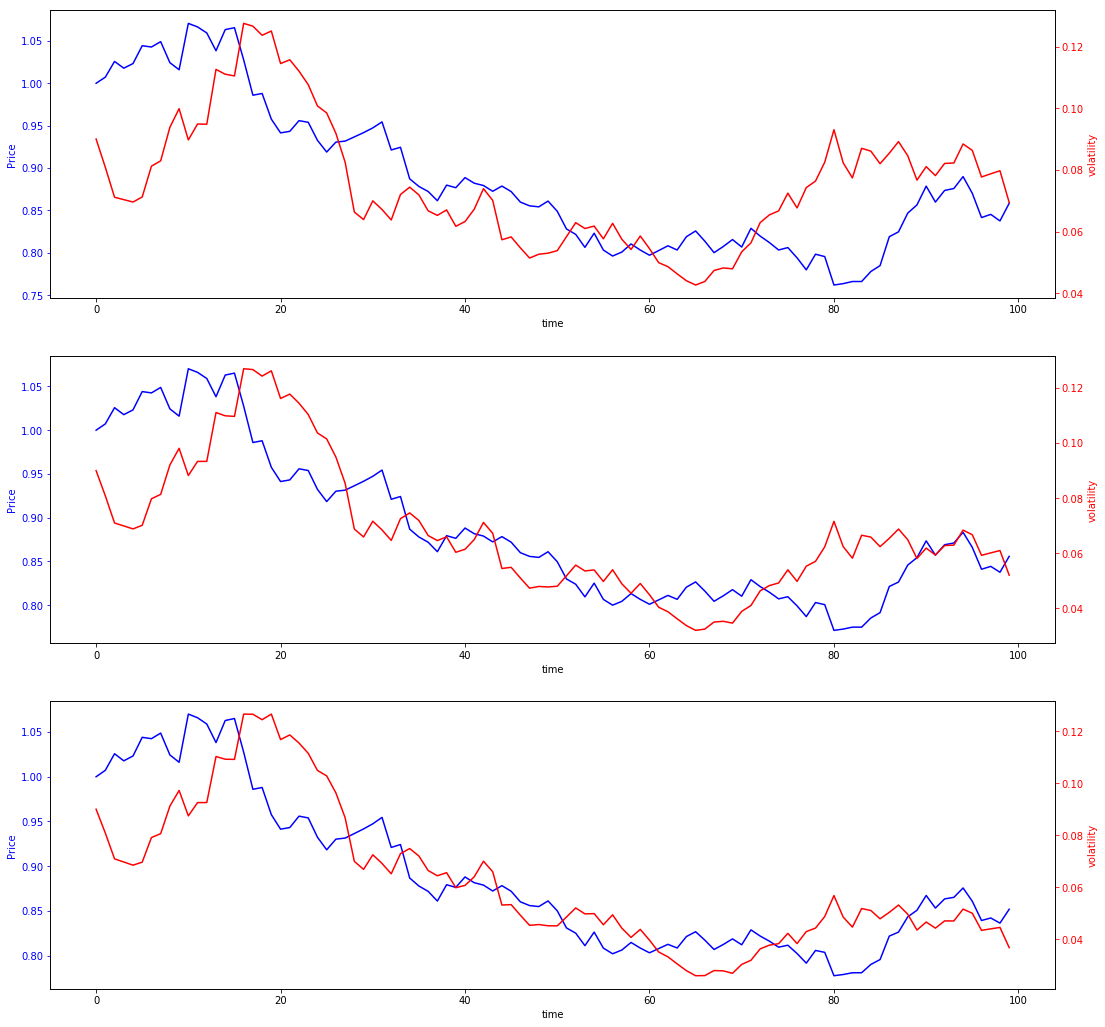

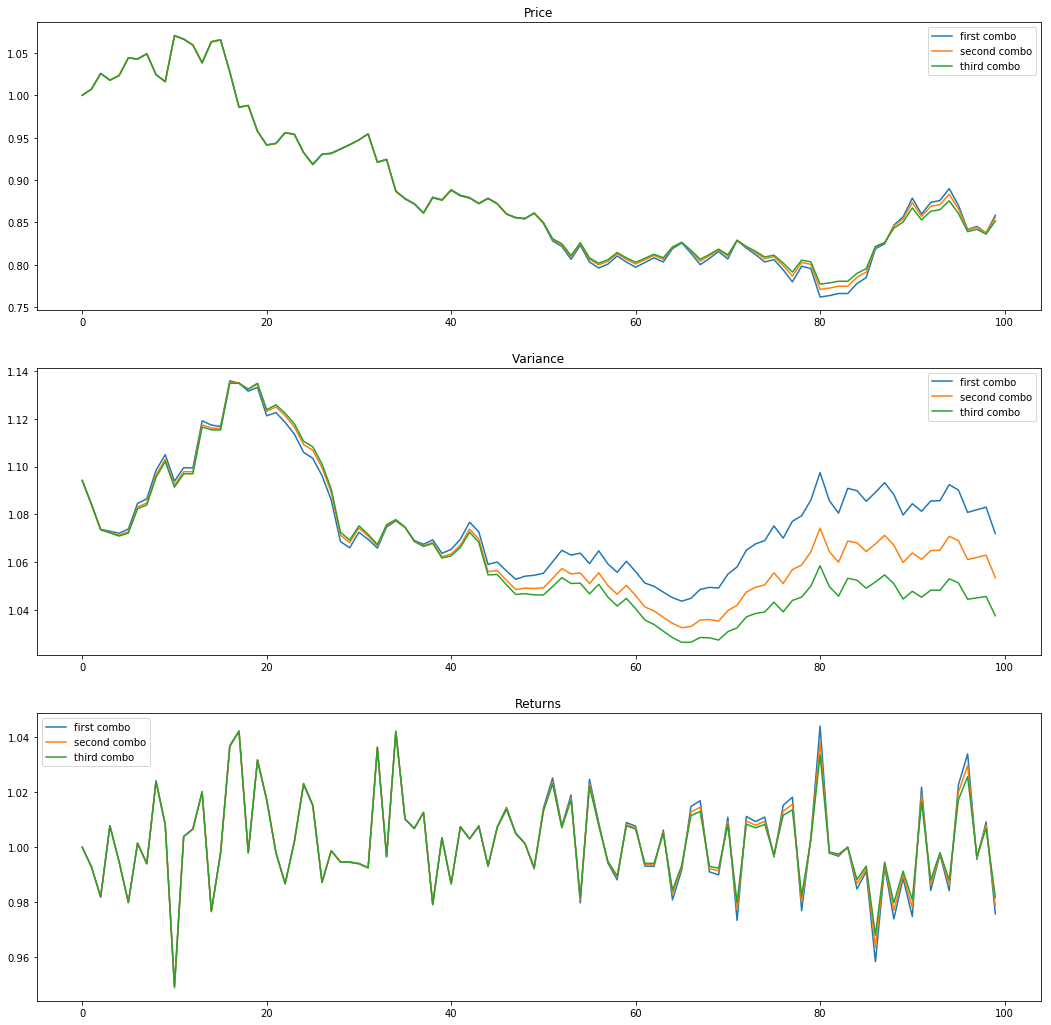

In [89]:
parameter_combos = ((6, 0.09, 0.3, -0.1), (2, 0.09, 0.3, -0.1), (0.2, 0.09, 0.3, -0.1),)

plt.figure(figsize=(18,18))
prices, volas, returns = plot_param_combos(parameter_combos, T=zoom)

plt.figure(figsize=(18,18))
plot_prices_volas_returns(prices, volas, returns, T=zoom)

With different Theta values

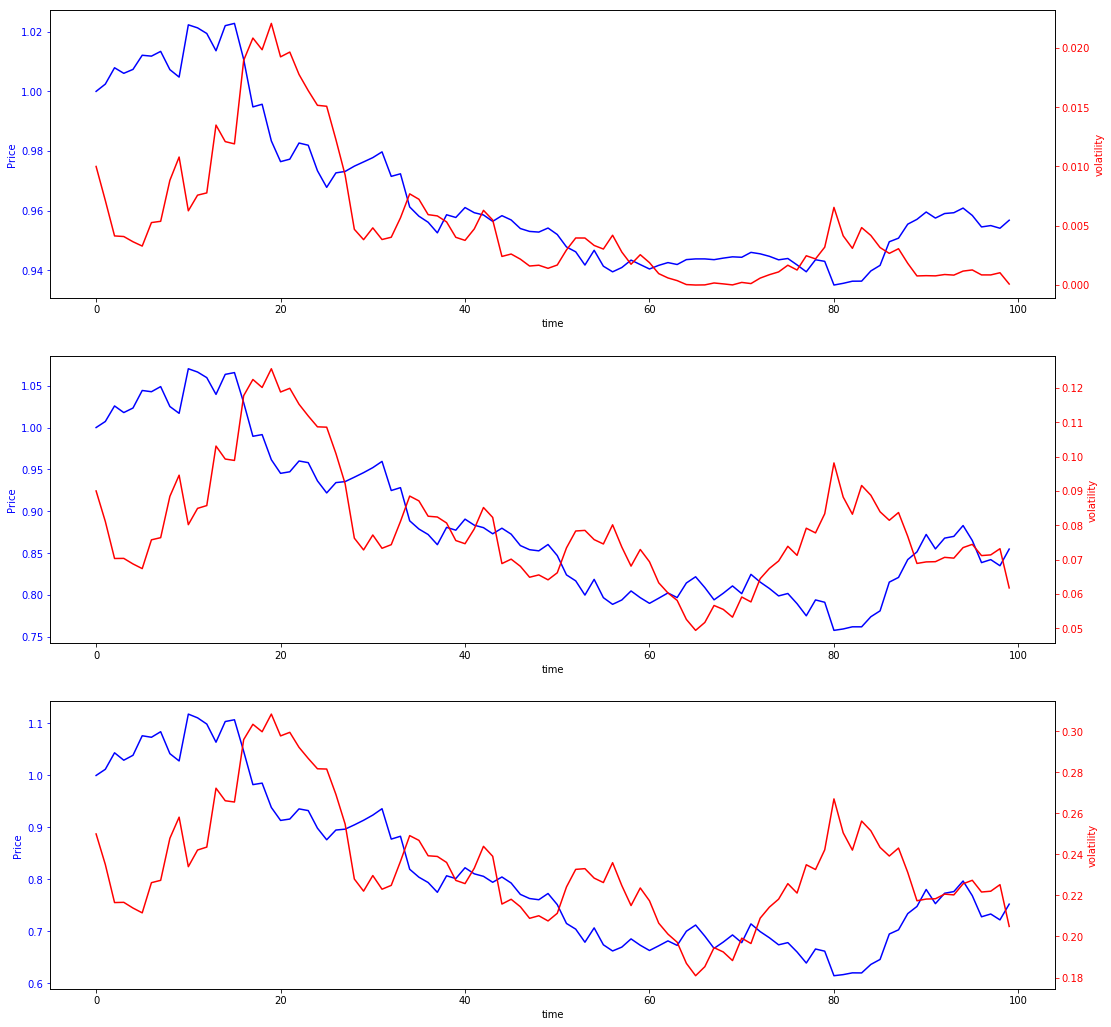

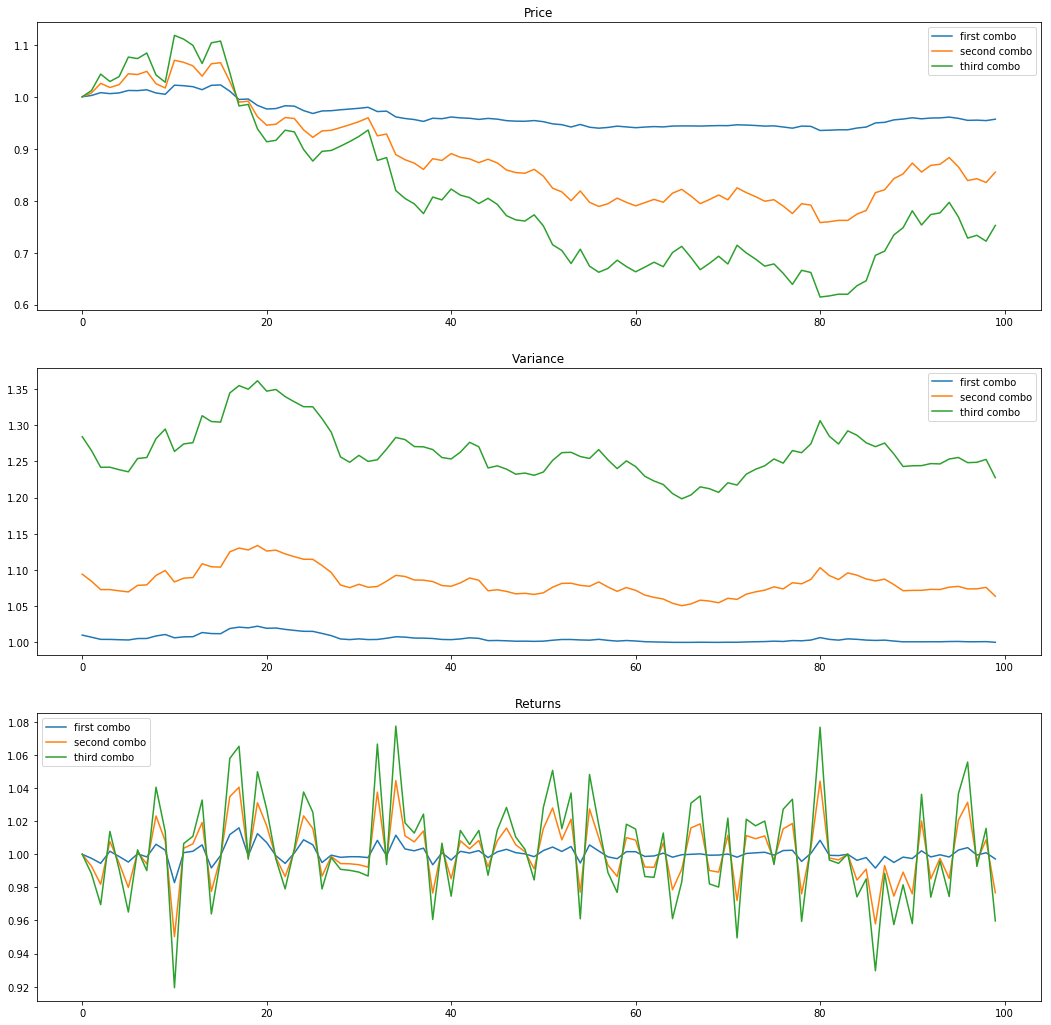

In [90]:
parameter_combos = ((2, 0.01, 0.3, -0.5), (2, 0.09, 0.3, -0.5), (2, 0.25, 0.3, -0.5),)

plt.figure(figsize=(18,18))
prices, volas, returns = plot_param_combos(parameter_combos,T=zoom)

plt.figure(figsize=(18,18))
plot_prices_volas_returns(prices, volas, returns, T=zoom)

With different Xi values

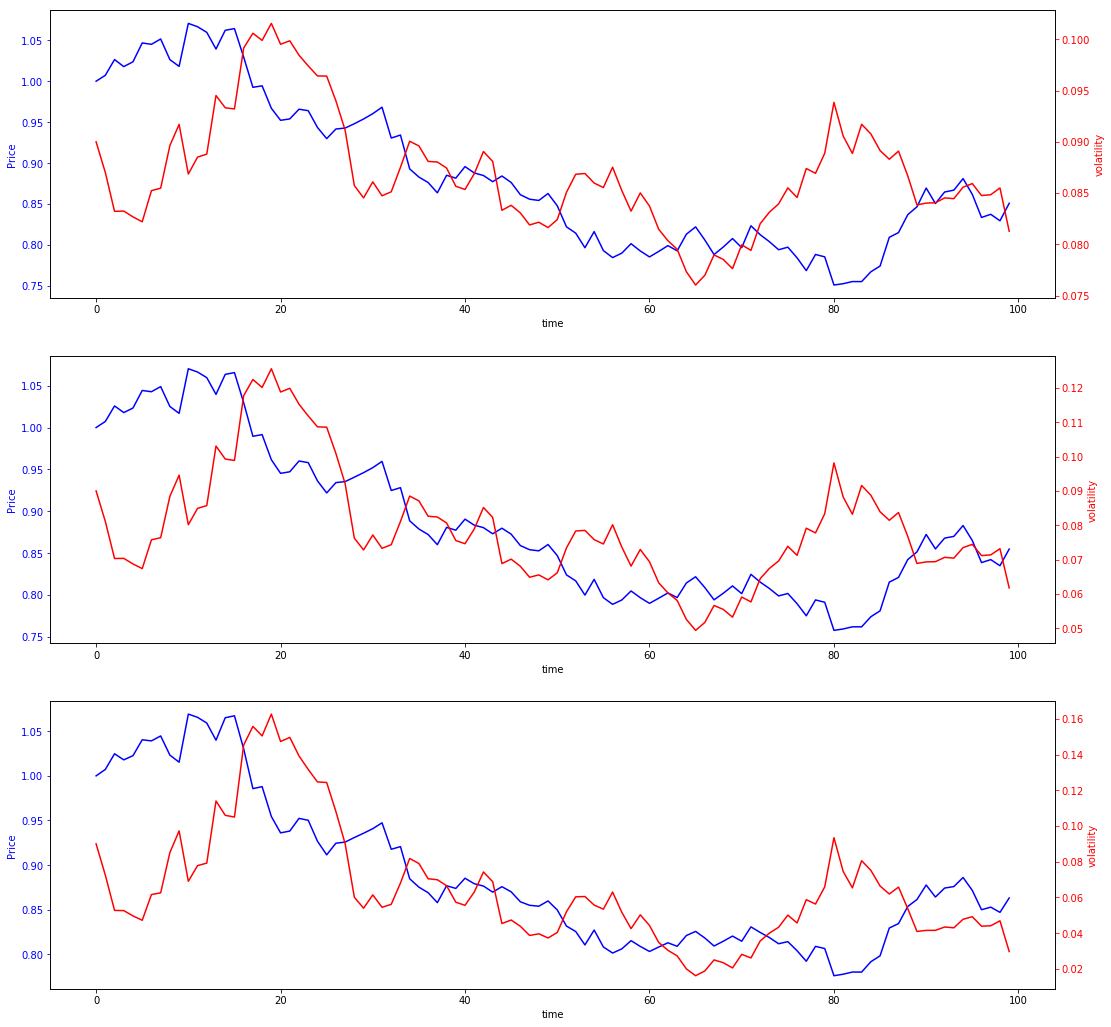

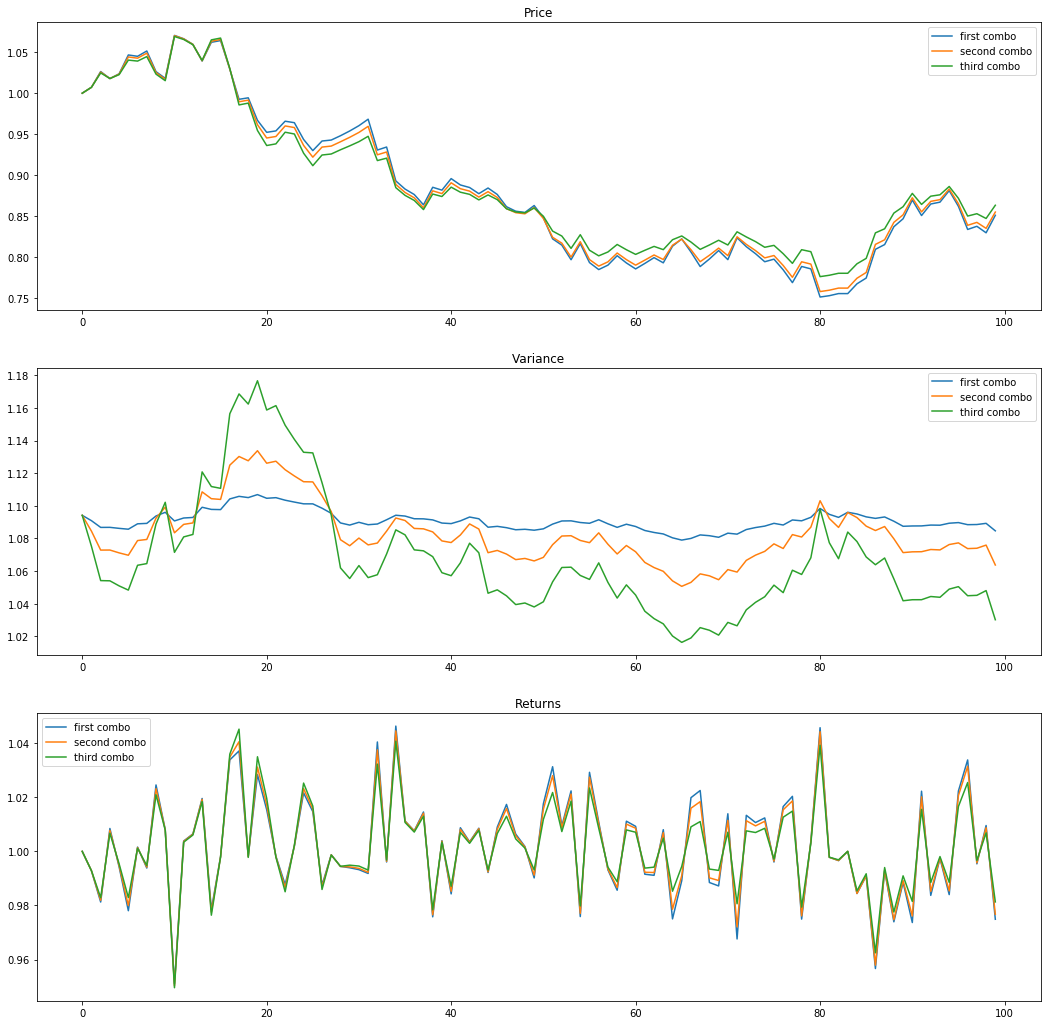

In [91]:
parameter_combos = ((2, 0.09, 0.1, -0.5), (2, 0.09, 0.3, -0.5), (2, 0.09, 0.6, -0.5),)

plt.figure(figsize=(18,18))
prices, volas, returns = plot_param_combos(parameter_combos, T=zoom)

plt.figure(figsize=(18,18))
plot_prices_volas_returns(prices, volas, returns, T=zoom)

With different Rho values:

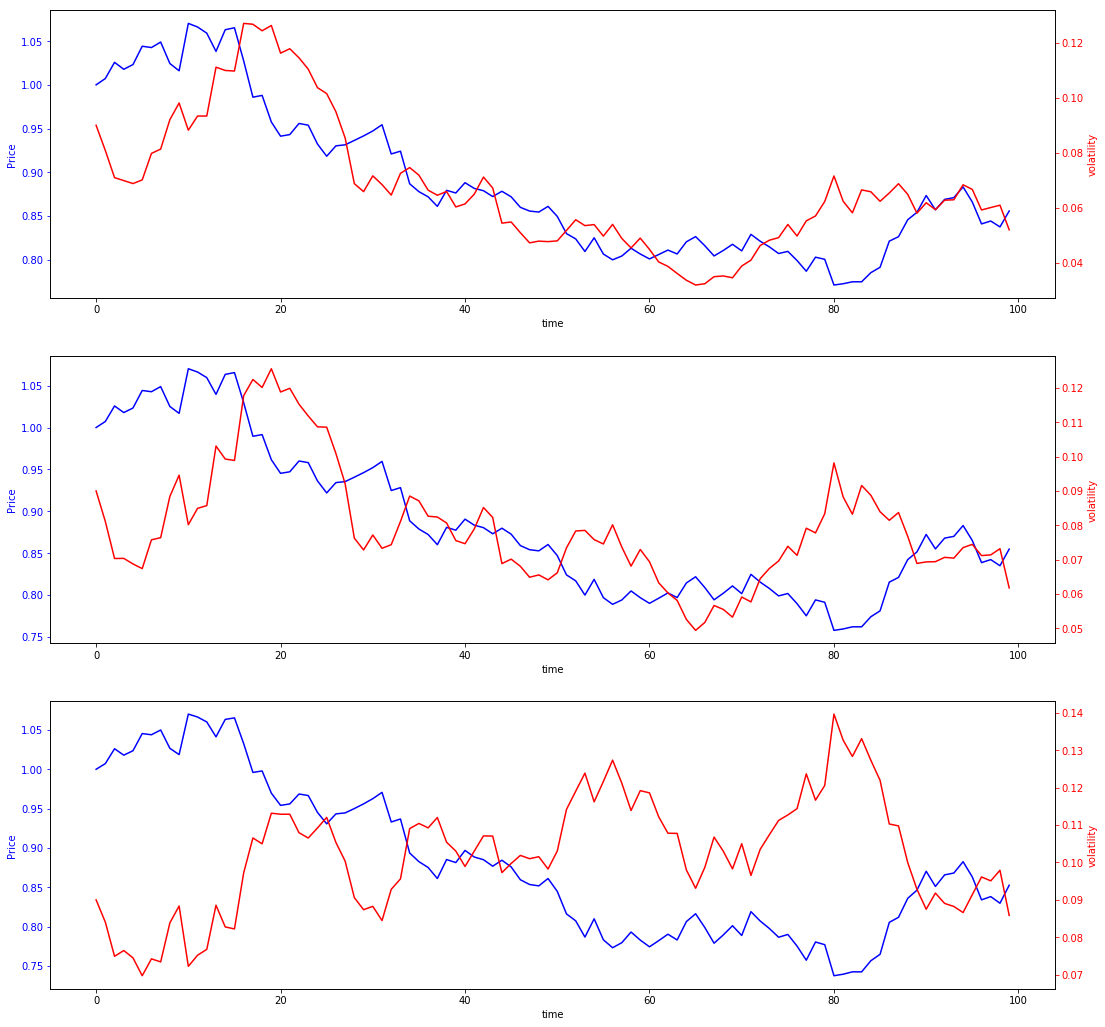

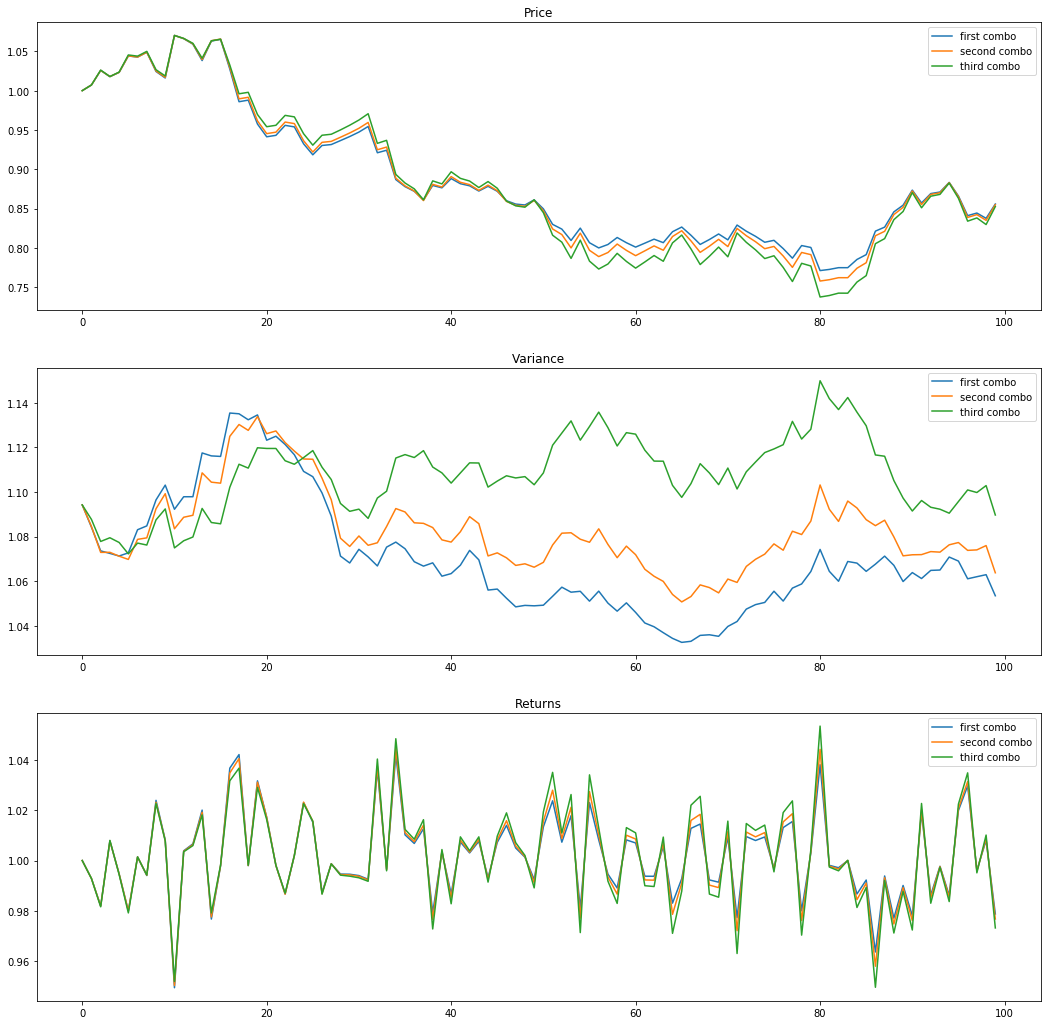

In [92]:
parameter_combos = ((2, 0.09, 0.3, -0.1), (2, 0.09, 0.3, -0.5), (2, 0.09, 0.3, -0.9),)

plt.figure(figsize=(18,18))
prices, volas, returns = plot_param_combos(parameter_combos, T=zoom)

plt.figure(figsize=(18,18))
plot_prices_volas_returns(prices, volas, returns, T=zoom)